In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [5]:
data = pd.read_csv("ames iowa housing.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df = data[data["GrLivArea"] <= 4000]
print(df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [7]:
numerical_features = ["YearBuilt", "GrLivArea", "TotalBsmtSF", "LotArea"]
X_numerical = data[numerical_features]
print(X_numerical)

      YearBuilt  GrLivArea  TotalBsmtSF  LotArea
0          2003       1710          856     8450
1          1976       1262         1262     9600
2          2001       1786          920    11250
3          1915       1717          756     9550
4          2000       2198         1145    14260
...         ...        ...          ...      ...
1455       1999       1647          953     7917
1456       1978       2073         1542    13175
1457       1941       2340         1152     9042
1458       1950       1078         1078     9717
1459       1965       1256         1256     9937

[1460 rows x 4 columns]


In [8]:
ordinal_features = ["BedroomAbvGr", "Fireplaces", "OverallCond", "OverallQual"]
X_ordinal = data[ordinal_features]
print(X_ordinal)

      BedroomAbvGr  Fireplaces  OverallCond  OverallQual
0                3           0            5            7
1                3           1            8            6
2                3           1            5            7
3                3           1            5            7
4                4           1            5            8
...            ...         ...          ...          ...
1455             3           1            5            6
1456             3           2            6            6
1457             4           2            9            7
1458             2           0            6            5
1459             3           0            6            5

[1460 rows x 4 columns]


In [9]:
categorical_features = ["BldgType", "Neighborhood"]
X_categorical = pd.get_dummies(data[categorical_features], drop_first=True)
print(X_categorical)

      BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  \
0               False            False           False            False   
1               False            False           False            False   
2               False            False           False            False   
3               False            False           False            False   
4               False            False           False            False   
...               ...              ...             ...              ...   
1455            False            False           False            False   
1456            False            False           False            False   
1457            False            False           False            False   
1458            False            False           False            False   
1459            False            False           False            False   

      Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                    False

In [10]:
X = pd.concat([X_numerical, X_ordinal, X_categorical], axis=1)
print(X)

      YearBuilt  GrLivArea  TotalBsmtSF  LotArea  BedroomAbvGr  Fireplaces  \
0          2003       1710          856     8450             3           0   
1          1976       1262         1262     9600             3           1   
2          2001       1786          920    11250             3           1   
3          1915       1717          756     9550             3           1   
4          2000       2198         1145    14260             4           1   
...         ...        ...          ...      ...           ...         ...   
1455       1999       1647          953     7917             3           1   
1456       1978       2073         1542    13175             3           2   
1457       1941       2340         1152     9042             4           2   
1458       1950       1078         1078     9717             2           0   
1459       1965       1256         1256     9937             3           0   

      OverallCond  OverallQual  BldgType_2fmCon  BldgType_Duple

In [11]:
y = np.log(data["SalePrice"])
print(y)

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
lambdas = np.logspace(-3, 3, 50)

In [26]:
train_errors, test_errors = [], []
for lambda_val in lambdas:
    model = Ridge(alpha=lambda_val)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_errors.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    y_test_pred = model.predict(X_test)
    test_errors.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    
    
    


In [27]:

print(f"Lambdas shape: {lambdas.shape}")
print(f"Train errors shape: {np.array(train_errors).shape}")
print(f"Test errors shape: {np.array(test_errors).shape}")

Lambdas shape: (50,)
Train errors shape: (50,)
Test errors shape: (50,)


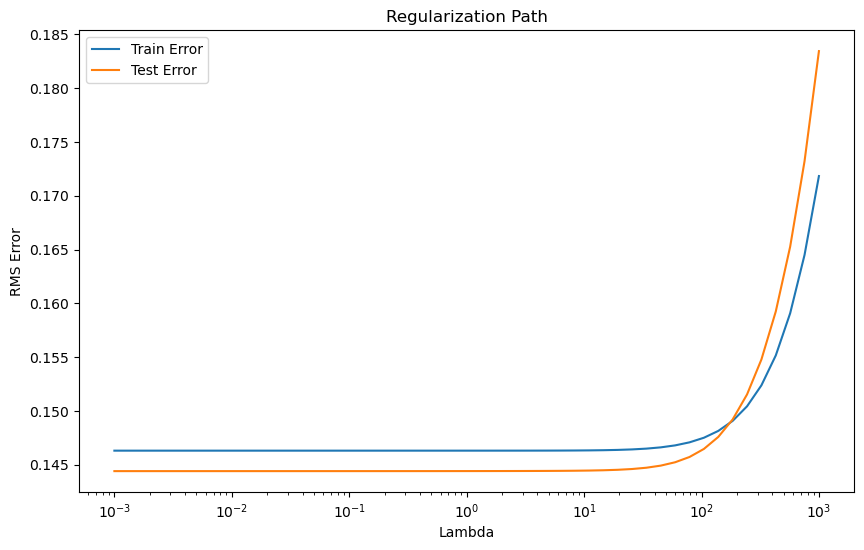

In [28]:
plt.figure(figsize=(10, 6))
plt.semilogx(lambdas, train_errors, label="Train Error")
plt.semilogx(lambdas, test_errors, label="Test Error")
plt.xlabel("Lambda")
plt.ylabel("RMS Error")
plt.title("Regularization Path")
plt.legend()
plt.show()

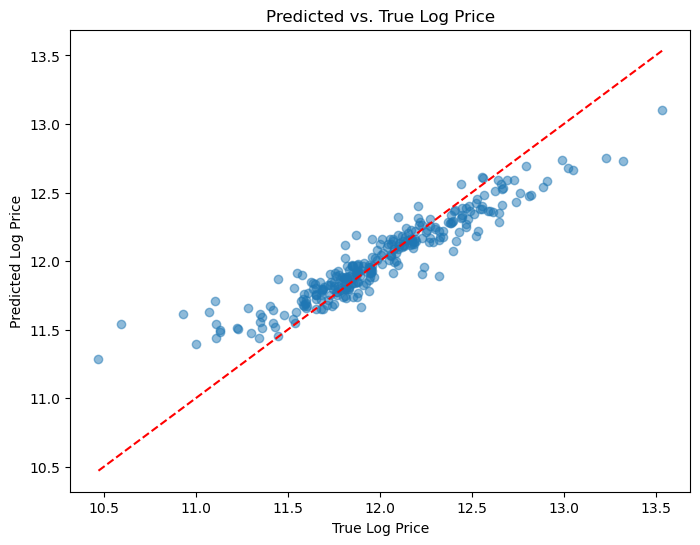

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("True Log Price")
plt.ylabel("Predicted Log Price")
plt.title("Predicted vs. True Log Price")
plt.show()